# 코코팜 4차 정기세션 과제

## 개념문제

### 빈칸 채워넣기

1. 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘은 ( K-Means 알고리즘 )이다.
2. 군집화의 성능을 평가하는 대표적인 방법은 ( 실루엣 분석 )을 이용하는 것이다.
3. GMM(Gaussian Mixture Model)은 데이터를 여러 개의 ( 가우시안 분포 )가 섞인 것으로 간주한다.
4. 평균 이동에서 최적화된 bandwidth 값을 찾기 위해서 사이킷런은 ( MeanShift클래스 )를 제공한다. 
5. GMM은 ( 정규 분포 ) 기반 군집화이고 K-평균은 ( 거리 ) 기반 군집화이다.

### T/F

1. 전체 실루엣 계수의 평균값은 0~1사이의 값을 가지며, 0에 가까울수록 좋다. ( F )
2. KMeans 군집화는 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못한다. ( T )
3. 평균 이동의 장점은 알고리즘의 수행 시간이 적게 걸린다는 것이다. ( F )
4. 평균 이동은 군집의 개수를 지정해야 한다. ( F )
5. GMM은 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다. ( T )

## 실습문제

### mnist_test.csv 다운로드 링크: https://www.kaggle.com/oddrationale/mnist-in-csv
- MNIST Dataset: 28 x 28 pixel로 이루어진 숫자 손 글씨 사진

### Q1. Mnist Dataset으로 K-means Cluster, GMM 비교하기

In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### MNIST Dataset Load

- 결과는 label과 각 pixel의 값

In [2]:
mnist_df = pd.read_csv('mnist_test.csv')
mnist_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 - ex) 50번째 이미지


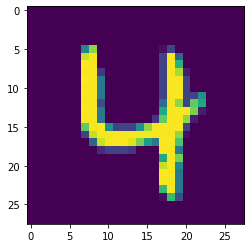

In [3]:
plt.imshow(mnist_df.iloc[49].values[1:].reshape(28, 28))

### mnist_data 만들기

In [4]:
mnist_data = mnist_df.drop('label', axis=1).values

In [5]:
print("mnist_data type: {0},  shape: {1}".format(type(mnist_data), mnist_data.shape))

mnist_data type: <class 'numpy.ndarray'>,  shape: (10000, 784)


### Q1-1. K-means cluster를 이용하여 10개의 cluster를 만들고, 'kmeans cluster' 컬럼을 생성하고 어떻게 매핑되었는지 확인해보기

In [6]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=200, random_state=0).fit(mnist_df)
cluster_labels = kmeans.predict(mnist_df)

mnist_df['kmeans_cluster'] = kmeans.labels_
mnist_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,kmeans_cluster
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


### Q1-2. gmm cluster를 이용하여 10개의 component를 만들고, 'gmm cluster' 컬럼을 생성하고 어떻게 매핑되었는지 확인해보기

In [7]:
gmm = GaussianMixture(n_components=10, random_state=0).fit(mnist_df)
gmm_cluster_labels = gmm.predict(mnist_df)

mnist_df['gmm_cluster'] = gmm_cluster_labels
mnist_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,kmeans_cluster,gmm_cluster
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,5
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,7
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,9


In [11]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k')
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

### 500개의 데이터 셋, 10개의 cluster 셋, cluster_std=0.5 을 만듬. 

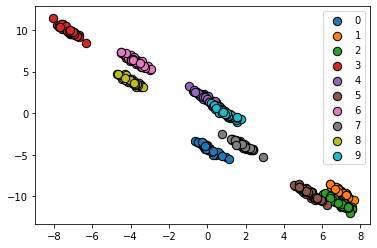

In [12]:
X, y = make_blobs(n_samples=500, n_features=2, centers=10, cluster_std=0.5, random_state=2990)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

### Q1-3. 위 함수와 X 이용하여 K-means clustering의 결과를 시각화하기

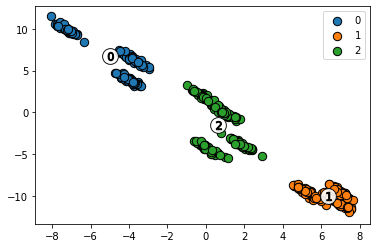

In [13]:
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

### Q1-4. 위 함수를 이용하여 GMM clustering의 결과를 시각화하기

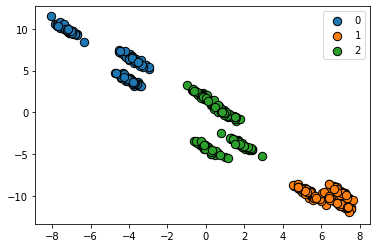

In [15]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)